In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from snownlp import SnowNLP
import time
import bixin
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
df = pd.read_csv('微博大V数据.csv')
df

,created_at,source,original_pic,text_gsub
0,2019-12-30 00:56:25,"<a href=""http://app.weibo.com/t/feed/t7LrE"" re...",NaN,转发微博
1,2019-12-30 00:57:27,NaN,NaN,[汗]
2,2019-12-30 00:59:07,NaN,NaN,#我们的歌# 勤深深这首也好听到爆！ http://t.cn/AiFoDQJg ​
3,2019-12-30 01:00:03,"<a href=""http://app.weibo.com/t/feed/6vtZb0"" r...",NaN,. ​
4,2019-12-30 01:13:41,"<a href=""http://app.weibo.com/t/feed/1Nou1F"" r...",NaN,http://t.cn/RJGXVNU ​
...,...,...,...,...
8047652,2020-02-05 23:06:57,"<a href=""http://app.weibo.com/t/feed/6yA4Al"" r...",http://wx3.sinaimg.cn/large/9c58f05bly1gblx89o...,上海两名病患家属殴打护士被刑拘！[拳头]↓↓ ​​​
8047653,2020-02-05 23:06:57,"<a href=""http://app.weibo.com/t/feed/6vtZb0"" r...",http://wx3.sinaimg.cn/large/dff1d1efly1gblxciw...,#联防联控 西安在行动# 【西安市新型冠状病毒感染的肺炎疫情防控指挥部办公室关于印发居家隔离...
8047654,2020-02-05 23:07:02,"<a href=""http://app.weibo.com/t/feed/c66T5g"" r...",http://wx3.sinaimg.cn/large/6a754803ly1gblxciu...,#武汉加油##吃肉也能减肥#TFBOYS复制了猛虎组织的成名路径，但恰恰相反 http://...
8047655,2020-02-05 23:07:09,"<a href=""http://weibo.com/"" rel=""nofollow"">iPh...",NaN,这就是为什么要戴口罩～～～～科普气溶胶


In [7]:
covid_str = '口罩|肺炎|疫情|传染|病毒|冠状|隔离|防控'
df['text_gsub'].fillna('None', inplace=True)
df_covid = df[df['text_gsub'].str.contains(covid_str)]

In [3]:
def senti(x):
    return SnowNLP(x).sentiments

In [8]:
df_covid['senti'] = df_covid['text_gsub'].apply(senti)
df_covid['senti']

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


722        0.019739
772        0.005512
2041       0.565038
4322       0.621413
4604       0.000324
             ...   
8047635    0.448168
8047636    0.890908
8047638    0.076310
8047653    0.442900
8047655    0.954353
Name: senti, Length: 487099, dtype: float64

In [34]:
df_covid['created_at'] = pd.to_datetime(df_covid['created_at'])
df_covid['created_at_string'] = df_covid['created_at'].apply(lambda x: x.strftime('%Y-%m-%d'))
df_covid

,created_at,source,original_pic,text_gsub,senti,created_at_string
722,2019-12-31 11:58:20,NaN,NaN,突发！武汉发现多名不明原因肺炎患者，没确定是否SARS病毒\nhttp://t.cn/AiF...,0.019739,2019-12-31
772,2019-12-31 13:27:35,"<a href=""http://weibo.com/"" rel=""nofollow"">鹿晗的...",NaN,#武汉不明原因肺炎不能断定是SARS#望早日出结果 ​,0.005512,2019-12-31
2041,2020-01-03 17:50:01,"<a href=""http://app.weibo.com/t/feed/6vtZb0"" r...",NaN,这个病毒很蹊跷。,0.565038,2020-01-03
4322,2019-12-01 00:25:45,"<a href=""http://app.weibo.com/t/feed/6vtZb0"" r...",http://wx3.sinaimg.cn/large/9523eabbgy1g9gj3v4...,【紫蝶莲】冬季防寒口罩耳罩二合一 券后9.80 \n[喜] \n蓄热保温，舒适耳绳，纯棉内...,0.621413,2019-12-01
4604,2019-12-01 00:33:04,"<a href=""http://app.weibo.com/t/feed/3auC5p"" r...",http://wx4.sinaimg.cn/large/006QTOVqly1g9ervsk...,【5.80】可孚.一次性医用口罩50只，每10只一袋，总共有5袋。每只都有独立包装的贵5元~...,0.000324,2019-12-01
...,...,...,...,...,...,...
8047635,2020-02-05 23:04:39,"<a href=""http://app.weibo.com/t/feed/3R2ZKL"" r...",NaN,#守护云南共抗疫情# #加强疫情防控 云南在行动# 【2分钟了解防范新型冠状病毒最新视频指南...,0.448168,2020-02-05
8047636,2020-02-05 23:04:47,NaN,NaN,我和父母对待疫情的心理变化，过于真实，哈哈哈 #十天前的我和十天后的我家人#\n http:...,0.890908,2020-02-05
8047638,2020-02-05 23:04:59,"<a href=""http://app.weibo.com/t/feed/3R2ZKL"" r...",NaN,#守护云南共抗疫情# #加强疫情防控 云南在行动# 【2分钟了解防范新型冠状病毒最新视频指南...,0.076310,2020-02-05
8047653,2020-02-05 23:06:57,"<a href=""http://app.weibo.com/t/feed/6vtZb0"" r...",http://wx3.sinaimg.cn/large/dff1d1efly1gblxciw...,#联防联控 西安在行动# 【西安市新型冠状病毒感染的肺炎疫情防控指挥部办公室关于印发居家隔离...,0.442900,2020-02-05


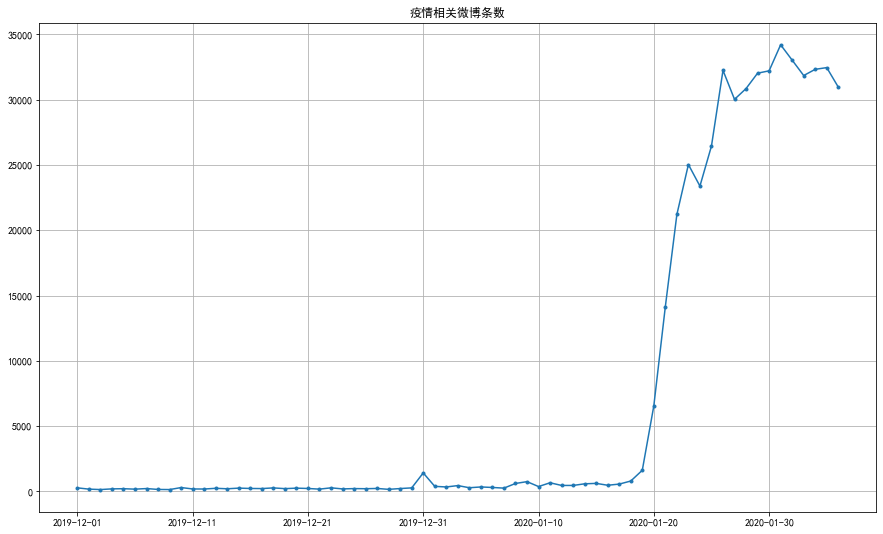

In [23]:
df_covid['created_at_string'].value_counts().sort_index().plot(figsize=(15,9), style='.-', grid=True, title='疫情相关微博条数')

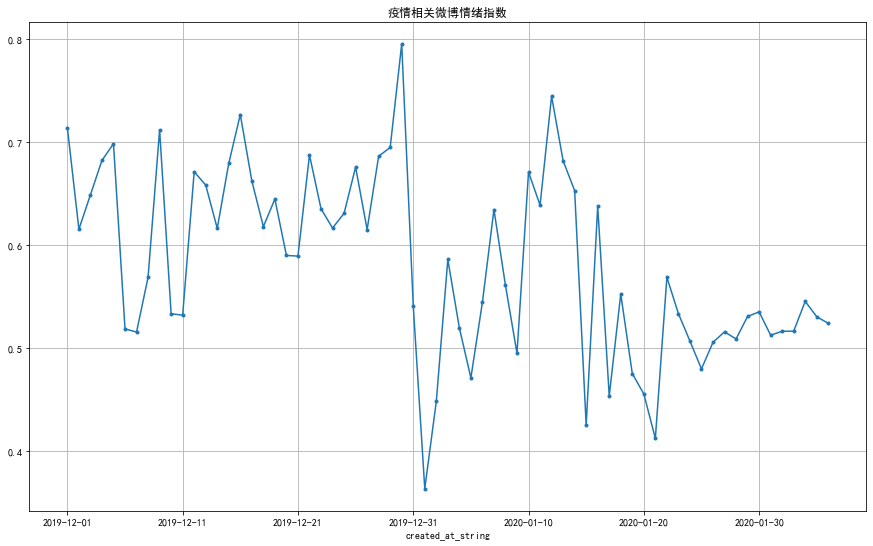

In [24]:
df_covid.groupby('created_at_string')['senti'].mean().sort_index().plot(figsize=(15,9), style='.-', grid=True, title='疫情相关微博情绪指数')

In [25]:
df_non_covid = df[~df['text_gsub'].str.contains(covid_str)].copy()
df_non_covid

,created_at,source,original_pic,text_gsub
0,2019-12-30 00:56:25,"<a href=""http://app.weibo.com/t/feed/t7LrE"" re...",NaN,转发微博
1,2019-12-30 00:57:27,NaN,NaN,[汗]
2,2019-12-30 00:59:07,NaN,NaN,#我们的歌# 勤深深这首也好听到爆！ http://t.cn/AiFoDQJg ​
3,2019-12-30 01:00:03,"<a href=""http://app.weibo.com/t/feed/6vtZb0"" r...",NaN,. ​
4,2019-12-30 01:13:41,"<a href=""http://app.weibo.com/t/feed/1Nou1F"" r...",NaN,http://t.cn/RJGXVNU ​
...,...,...,...,...
8047650,2020-02-05 23:06:37,"<a href=""http://app.weibo.com/t/feed/1YjXTR"" r...",NaN,转发微博
8047651,2020-02-05 23:06:56,"<a href=""http://app.weibo.com/t/feed/9ksdit"" r...",NaN,//// 至关重要的公共信息都是记者拿命搏来的。财新和南方周末都开通了限时免费阅读。不要去看...
8047652,2020-02-05 23:06:57,"<a href=""http://app.weibo.com/t/feed/6yA4Al"" r...",http://wx3.sinaimg.cn/large/9c58f05bly1gblx89o...,上海两名病患家属殴打护士被刑拘！[拳头]↓↓ ​​​
8047654,2020-02-05 23:07:02,"<a href=""http://app.weibo.com/t/feed/c66T5g"" r...",http://wx3.sinaimg.cn/large/6a754803ly1gblxciu...,#武汉加油##吃肉也能减肥#TFBOYS复制了猛虎组织的成名路径，但恰恰相反 http://...


In [26]:
df_non_covid['created_at'] = pd.to_datetime(df_non_covid['created_at'])
df_non_covid['created_at_string'] = df_non_covid['created_at'].apply(lambda x: x.strftime('%Y-%m-%d'))
df_non_covid

,created_at,source,original_pic,text_gsub,created_at_string
0,2019-12-30 00:56:25,"<a href=""http://app.weibo.com/t/feed/t7LrE"" re...",NaN,转发微博,2019-12-30
1,2019-12-30 00:57:27,NaN,NaN,[汗],2019-12-30
2,2019-12-30 00:59:07,NaN,NaN,#我们的歌# 勤深深这首也好听到爆！ http://t.cn/AiFoDQJg ​,2019-12-30
3,2019-12-30 01:00:03,"<a href=""http://app.weibo.com/t/feed/6vtZb0"" r...",NaN,. ​,2019-12-30
4,2019-12-30 01:13:41,"<a href=""http://app.weibo.com/t/feed/1Nou1F"" r...",NaN,http://t.cn/RJGXVNU ​,2019-12-30
...,...,...,...,...,...
8047650,2020-02-05 23:06:37,"<a href=""http://app.weibo.com/t/feed/1YjXTR"" r...",NaN,转发微博,2020-02-05
8047651,2020-02-05 23:06:56,"<a href=""http://app.weibo.com/t/feed/9ksdit"" r...",NaN,//// 至关重要的公共信息都是记者拿命搏来的。财新和南方周末都开通了限时免费阅读。不要去看...,2020-02-05
8047652,2020-02-05 23:06:57,"<a href=""http://app.weibo.com/t/feed/6yA4Al"" r...",http://wx3.sinaimg.cn/large/9c58f05bly1gblx89o...,上海两名病患家属殴打护士被刑拘！[拳头]↓↓ ​​​,2020-02-05
8047654,2020-02-05 23:07:02,"<a href=""http://app.weibo.com/t/feed/c66T5g"" r...",http://wx3.sinaimg.cn/large/6a754803ly1gblxciu...,#武汉加油##吃肉也能减肥#TFBOYS复制了猛虎组织的成名路径，但恰恰相反 http://...,2020-02-05


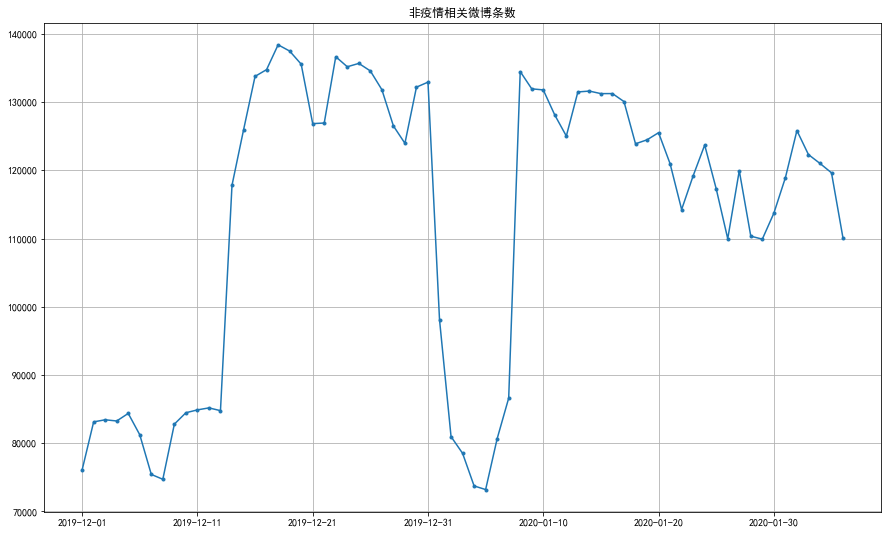

In [27]:
df_non_covid['created_at_string'].value_counts().sort_index().plot(figsize=(15,9), style='.-', grid=True, title='非疫情相关微博条数')

In [30]:
btime = time.time()
df_non_covid['senti'] = df_non_covid['text_gsub'].apply(senti)
print(time.time()-btime)

76742.11771082878


In [ ]:
df_non_covid['created_at_string'] = df_non_covid['created_at'].apply(lambda x: str(x)[:10])
df_non_covid.groupby('created_at_string')['senti'].mean().sort_index().plot(figsize=(15,9), style='.-', grid=True, title='非疫情相关微博情绪指数')

In [31]:
df_covid[['created_at', 'text_gsub', 'senti']].to_csv('weibo_covid_senti.csv', index=False)
df_non_covid[['created_at', 'text_gsub', 'senti']].to_csv('weibo_non_covid_senti.csv', index=False)

In [7]:
# weibo_text = pd.read_csv('weibo_text.csv', usecols=['index', 'text_gsub'])
btime = time.time()
weibo_text['senti'] = weibo_text['text_gsub'].apply(bixin.predict)
print(time.time() - btime)
weibo_text[['index', 'senti']].to_csv('weibo_senti2.csv', index=False)


1977.4771859645844
